In [1]:
% autosave 30

Autosaving every 30 seconds


# BE pendule double 
#### ZHANG Xunjie 
#### 11310840

### OBJECTIF :
L’objectif du travail est de modéliser numériquement, puis d’analyser
le mouvement d’un pendule double et sa transition vers le chaos. Le
résultat est un notebook Ipython avec 3 parties : programmation de la
méthode numérique, analyse des résultats, conclusion. 

In [2]:
import BE_pendule_double as B
reload(B)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

##  1. Cas Linéralisation:
#### on fait linéralisation 

In [3]:
B.matrice()

array([[-19.6 ,  17.64],
       [ 98.  , -98.  ]])

#### valeur propres et vecteur propres de matrice A

In [4]:
A = B.matrice()
D,V = B.propre(A)
B.propre(A)

(array([  -1.65667143, -115.94332857]), array([[ 0.70105361, -0.18010123],
        [ 0.71310857,  0.98364808]]))

### 1.1 model 1 :

#### valeur propre et vecteur model 1 : 

In [5]:
D[0],V[0]

(-1.6566714305160559, array([ 0.70105361, -0.18010123]))

#### mouvement des deux pendule pour model1

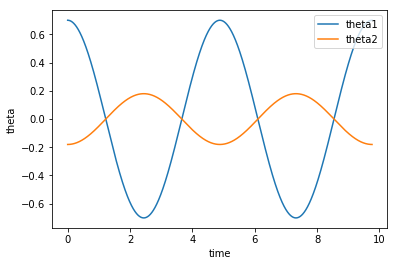

In [6]:
B.line_modle1(A)

### 1.2  model 2
#### valeur propre et vecteur model 2 : 

In [7]:
D[1],V[1]

(-115.94332856948395, array([ 0.71310857,  0.98364808]))

#### mouvement des deux pendule pour model1

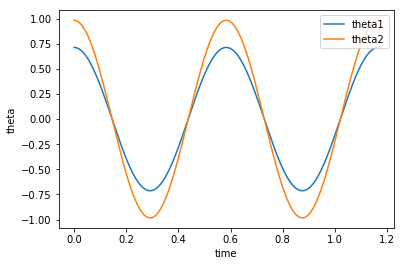

In [8]:
B.line_modle2(A)

### 1.3 Solution de linéralisation avec ODE

#### condition initial:

In [9]:
y0 = [np.pi/20,np.pi/30,0,0]
dt =0.001
t = np.linspace(0,20,num=1000)

#### solution avec odient

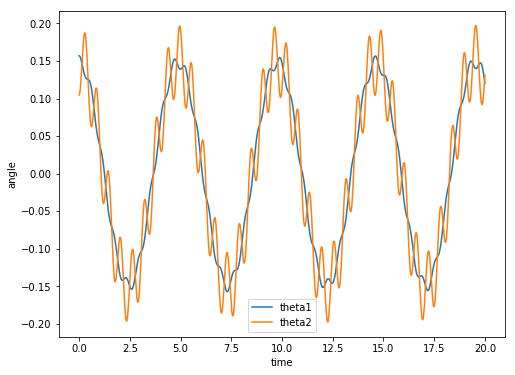

In [10]:
y_line = B.solu_line(y0,t)
plt.figure(figsize=(8,6))
plt.plot(t,y_line[:,0])
plt.plot(t,y_line[:,1])
plt.legend(['theta1','theta2'])
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

## 2. Solution numérique

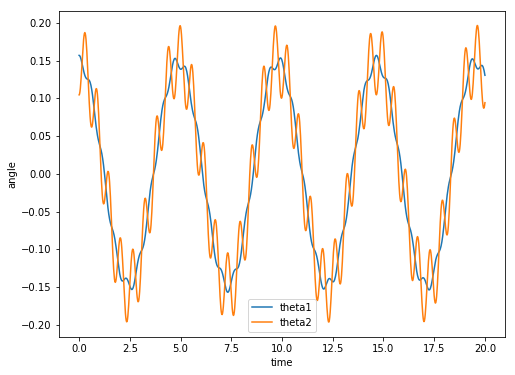

In [11]:
y2 = B.chaos_1(y0,t)
plt.figure(figsize=(8,6))
plt.plot(t,y2[:,0])
plt.plot(t,y2[:,1])
plt.legend(['theta1','theta2'])
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

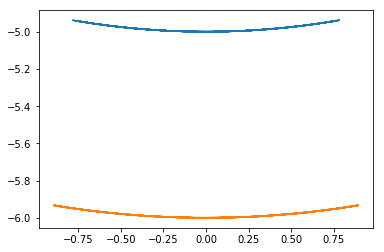

In [12]:
y,x1,y1,x2,y2=B.chaos_2(y0,t)
plt.figure()
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

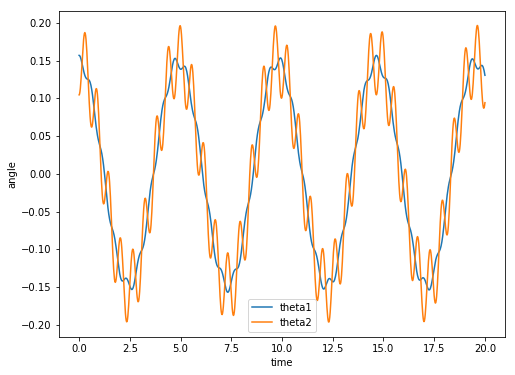

In [13]:
y_num= B.chaos_1(y0,t)
plt.figure(figsize=(8,6))
plt.plot(t,y_num[:,0])
plt.plot(t,y_num[:,1])
plt.legend(['theta1','theta2'])
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

comparer solution de $\theta_1$ numérique et de solution linéaire

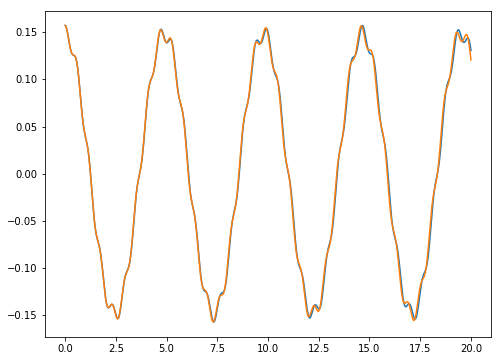

In [14]:
plt.figure(figsize=(8,6))
plt.plot(t,y_num[:,0])
plt.plot(t,y_line[:,0])

écart de $\theta_1$, $\theta_2$

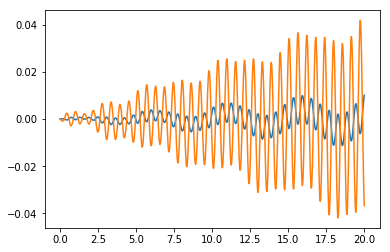

In [15]:
plt.plot(t,(y_num[:,0]-y_line[:,0]))
plt.plot(t,(y_num[:,1]-y_line[:,1]))

## 3. Cas anslyse avec un forçsage
on choisir le promier frequence pour wf. Et on augementer l'implitude par changer condition initial des deux angles $\theta_1$ et $\theta_2$

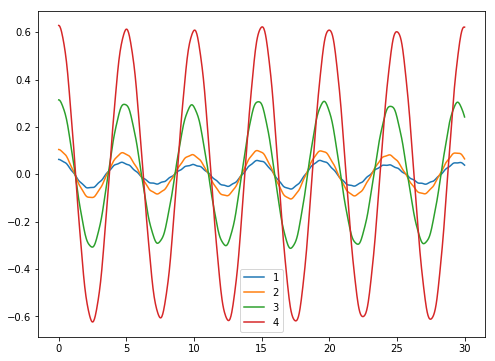

In [16]:
w = D[0]
a  = 1
t = np.linspace(0,30,num=1000)
y01 = [np.pi/50,np.pi/50,0,0]
y02 = [np.pi/30,np.pi/30,0,0]
y03 = [np.pi/10,np.pi/10,0,0]
y04 = [np.pi/5,np.pi/5,0,0]
plt.figure(figsize=(8,6))
y1= B.solu_f(y01,t,a,w)
y2= B.solu_f(y02,t,a,w)
y3= B.solu_f(y03,t,a,w)
y4= B.solu_f(y04,t,a,w)
plt.plot(t,y1[:,0])
plt.plot(t,y2[:,0])
plt.plot(t,y3[:,0])
plt.plot(t,y4[:,0])
plt.legend(['1','2','3','4'])

## 4. Conservation d'énergie de solution numérique

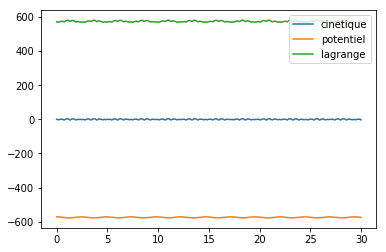

In [17]:
L,T,U=B.energie(y0,t)
plt.figure()
plt.plot(t,T)
plt.plot(t,U)
plt.plot(t,L)
plt.legend(['cinetique','potentiel','lagrange'])
plt.show()

## 5. Transition vers le chaos
### 5.1 Solution numérique est considérée à la solution linéaire

3.26530612245 degree


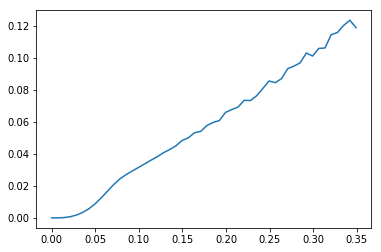

In [18]:
t = np.linspace(0,20,num=1000)
theta = np.linspace(0,np.pi/9,num=50)
N = len(theta)
ecart = np.zeros(len(theta))
for i in range(N):
    y0 = [theta[i],0,0,0]
    y_num = B.chaos_1(y0,t)
    y_line = B.solu_line(y0,t)
    ecart[i] = max(abs(y_num[:,0]-y_line[:,0]))
plt.plot(theta,ecart)
for i in range(N):
    y0 = [theta[i],0,0,0]
    y_num = B.chaos_1(y0,t)
    y_line = B.solu_line(y0,t)
    erreur = max(abs(y_num[:,0]-y_line[:,0]))
    if erreur > 0.01:
        theta0 = theta[i]
        break
print theta0*180/np.pi,'degree'
        

### 5.2 Chaos

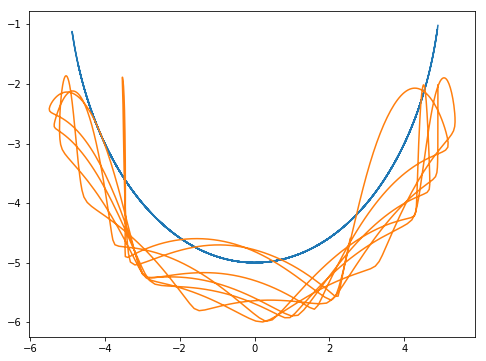

In [19]:
#y0 =[np.pi/2.5,0,0,0]
#y0 =[np.pi/2.4,0,0,0]
y0 =[np.pi/2.3,0,0,0]
#y0 =[np.pi/2.2,0,0,0]
#y0 =[np.pi/2.1,0,0,0]
#y0 =[np.pi/2.0,0,0,0]
t = np.linspace(0,20,num=1000)
y,x1,y1,x2,y2=B.chaos_2(y0,t)
plt.figure(figsize=(8,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

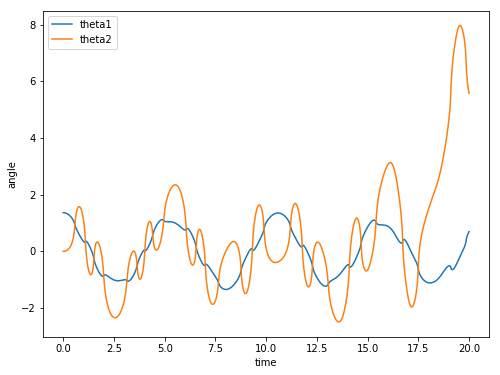

In [20]:
y = B.chaos_1(y0,t)
plt.figure(figsize=(8,6))
plt.plot(t,y[:,0])
plt.plot(t,y[:,1])
plt.legend(['theta1','theta2'])
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

### 5.3 optionnel

In [21]:
A = np.linspace(np.pi/2,np.pi,50)
B= np.linspace(0,np.pi,50)
for i in A:
    for j in B :
        y0 = [ i,j,0,0]

##  6. Conclusion
Dans ce  BE, nous a fait à solver la problem de pendule doubled,  ce travail m'aide de ouvrir les régimes chaotiques et les problems qu'ils posent pour la résolution exacte des équations de mouvement.  On aussi consider autre problem utilisant linéralisation pour simplifier le probelm compliqué.